# TensorFlow Getting Started

[TensorFlow Getting Started](https://www.tensorflow.org/get_started/get_started)にあるサンプルを動かしてみます

### Getting Startedサンプル

[Shift]+[Enter]　で下記のサンプルを実行します

In [2]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


### y = W * x + b

これは機械学習のサンプルです。

機械学習で何を『学習』させるか、というと、

中学校で習った１次関数 y=ax+b の 傾きと切片を学習で求めます。

ここでは、機械学習で用いる用語として　y = W*x + b と表します。傾きはW:Weight(重み）、切片はb:bias（バイアス）で表します。

教師データは

```
#training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
```

xが1のときyが０になり、xが1のときyが-1になり、以下同様にx=3のときy=-2、x=4のときy=-3になる、という４組の教師データのみを用います。

人間が考えても正解がわかりそうです。xが１増えるとyが1減っているので、W(Weight:重み）は-1、b(bias:バイアス）はxが0のときの値なので1のはずです。

式で書くと

```
y = -1 * x + 1
```

となりそうです。検算してみると、

x=1のとき、-1 * 1 + 1 = 0、x=2のとき、-1 * 2 + 1 = -1、　x=3のとき、-1 * 3 + 1 = -2、x=4のとき、-1 * 4 + 1 = -3、で合っているようです。

この式をグラフ表示すると下記のようになります。（[Shift]+[Enter]で実行）


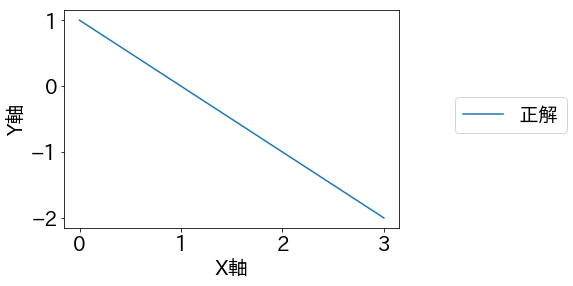

In [23]:
import math
import numpy as np
from matplotlib import pyplot

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = -1 * x + 1               # 直線の式

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'正解')      # 直線を引きます

pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show()              # グラフを描画します

### TensorFlowでの機械学習

サンプルプログラムでは、教師データ（training data）から、上記のW:重みとb:バイアスの値を見つけていきます。

[Shift]+[Enter]で下記のサンプルを実行し、結果を確認します

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


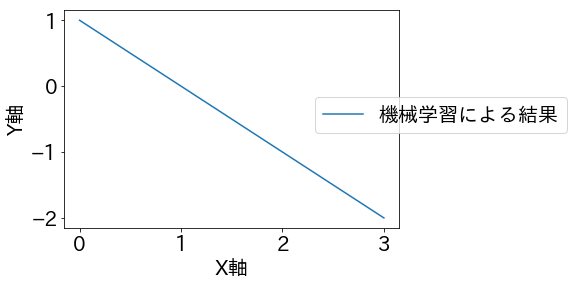

In [21]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=0.3、b=-0.3を指定
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = curr_W * x + curr_b               # 直線の式

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'機械学習による結果')

pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

W=-1、b=1の正解を正しく見つけられたようです。「loss: 5.69997e-11」は誤差を表します。「e-11」は 「0.000...」と0が11個続く精度であることを表します。

どのように機械学習が行われたかを確認していきます。

### 初期値の設定

このサンプルでは、機械学習を始める初期値として

```
W=0.3、b=-0.3
```

を使っています。

グラフで表示すると以下のようになります（[Shift]+[Enter]で実行します）。

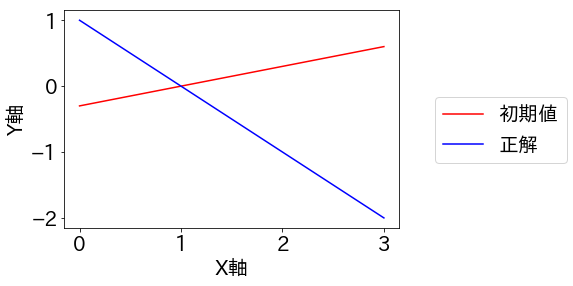

In [31]:
import math
import numpy as np
from matplotlib import pyplot

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
yi = .3 * x - .3               # 直線の式
ya = -1 * x + 1

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,yi, color="red", label=u'初期値')
pyplot.plot(x,ya, color="blue", label=u'正解') 

pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show()              # グラフを描画します

この初期値： W = 0.3、b = -0.3　で学習データ（training_data)として

```
# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

```

で機械学習させた結果、正しく w=-1、b=1を見出すことができました。グラフで表示してみます。


W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


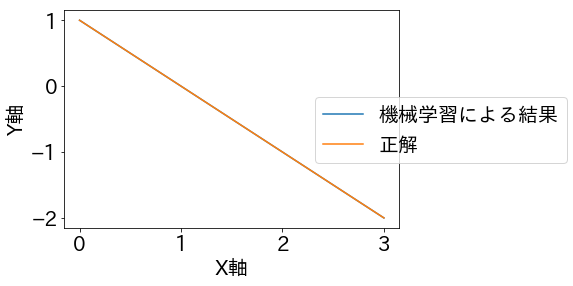

In [33]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=0.3、b=-0.3を指定
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = curr_W * x + curr_b               # 直線の式
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'機械学習による結果')
pyplot.plot(x,ya, label=u'正解')

pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

では、初期値を変えるとどうなるでしょうか？

### 初期値を変えて確認

初期値として

```
W = 3
b = -3
```

で実行してみます

W: [-0.9999904] b: [ 0.99997181] loss: 5.33532e-10


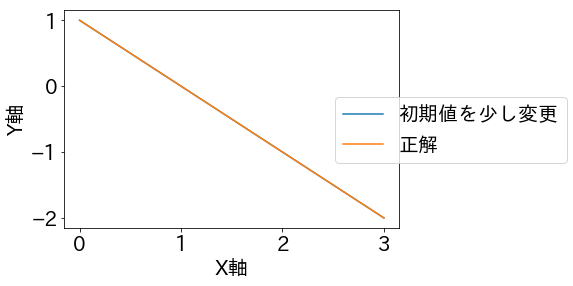

In [5]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=3、b=-3を指定
W = tf.Variable([3], dtype=tf.float32)
b = tf.Variable([-3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  
y = curr_W * x + curr_b 
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'初期値を少し変更')
pyplot.plot(x,ya, label=u'正解')


pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

全然問題なく正解を見つけられたようです。ただし、損失（loss）が若干増大しており精度が落ちていることがわかります。

では、もっと大きく初期値を変えて試してみます。

初期値として

```
W = 30000
b = -30000
```

で実行してみます


W: [-0.92821401] b: [ 0.78894049] loss: 0.029759


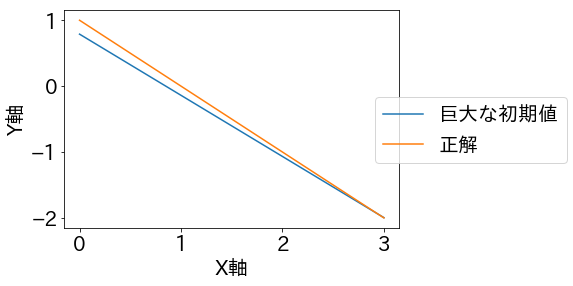

In [4]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=30000、b=-30000を指定
W = tf.Variable([30000], dtype=tf.float32)
b = tf.Variable([-30000], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  
y = curr_W * x + curr_b 
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'巨大な初期値')
pyplot.plot(x,ya, label=u'正解')


pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

さすがにこの初期値W=30000、b=-30000では結構差が出てしまうようです。

### 学習データを減らして確認

次に、初期値は最初のまま（W=0.3、b=-0.3）で、学習データを減らしてみます。

学習データを３項目にしてみます

W: [-0.99950403] b: [ 0.99887252] loss: 5.4713e-07


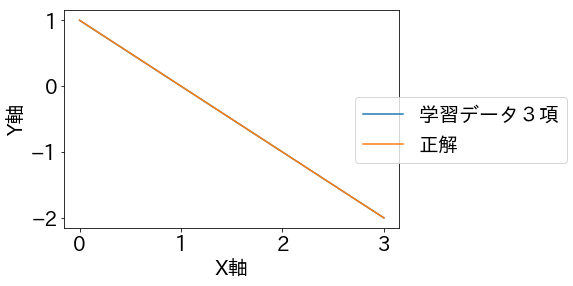

In [8]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=0.3、b=-0.3を指定
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# 学習データ（training data)を3項目にして確認
x_train = [1, 2, 3]
y_train = [0, -1, -2]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = curr_W * x + curr_b               # 直線の式
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'学習データ３項')
pyplot.plot(x,ya, label=u'正解')

pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

In [ ]:
学習データが３項目でもまずまずの答えが得られているようです。ただしやはり損失（loss）が大きくなっており精度が落ちています。

次に学習データを２項目にして確認してみます


W: [-0.94937813] b: [ 0.91809219] loss: 0.00135269


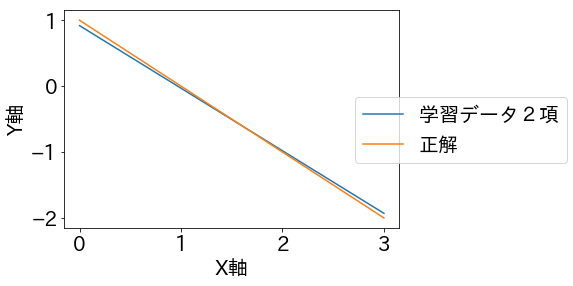

In [7]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=0.3、b=-0.3を指定
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# 学習データ（training data)を２項目にして確認
x_train = [1, 2]
y_train = [0, -1]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = curr_W * x + curr_b               # 直線の式
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'学習データ２項')
pyplot.plot(x,ya, label=u'正解')


pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

やはりだいぶ差が出てしまいますね。

### オプティマイザーを変えて確認

次に異なるオプティマイザーを使用して確認してみます。

AdamOptimizerを使用してみます。

W: [-0.97119844] b: [ 0.91828704] loss: 0.00452471


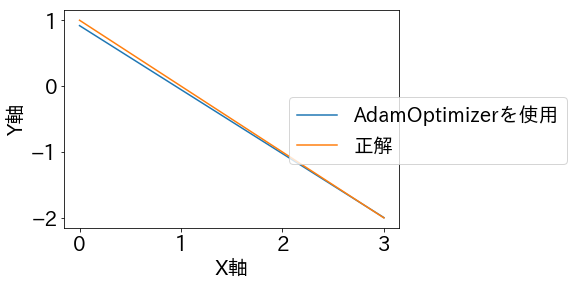

In [16]:
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot

font = {'family' : 'IPAexGothic', 'weight' : 'bold', 'size'   : 20}
pyplot.rc('font', **font)

# W:Weightとb:biasの初期値としてW=0.3、b=-0.3を指定
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
# optimizer = tf.train.GradientDescentOptimizer(0.01)
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# 学習データ（training data)
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x = np.linspace(0,3,4)  # 0から3の間で等間隔に４個の値を生成します　→ xの値として(0, 1, 2, 3)を生成します
y = curr_W * x + curr_b               # 直線の式
ya = -1 * x + 1

pyplot.xlabel(u'X軸')
pyplot.ylabel(u'Y軸')

pyplot.plot(x,y, label=u'AdamOptimizerを使用')
pyplot.plot(x,ya, label=u'正解')


pyplot.legend(loc='upper right',
           bbox_to_anchor=(1, 0.5, 0.5, .100), 
           borderaxespad=0.,)

pyplot.show() 

オプティマイザーとしてはGradientDescentOptimizerのほうが精度が良いようです。